In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
Load Dataset & Initial Exploration

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

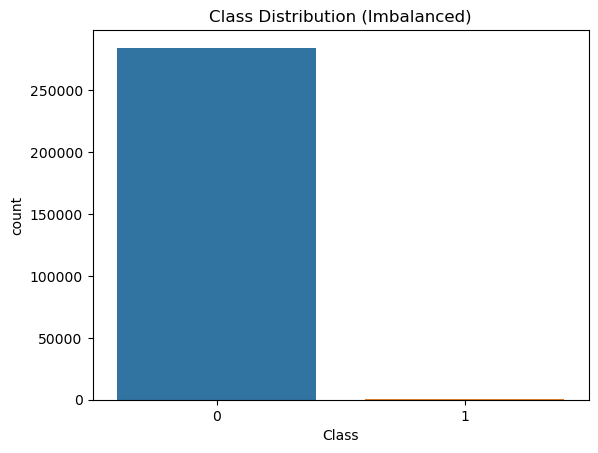

In [3]:
df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Imbalanced)')
plt.show()


In [ ]:
DataFrame df Exists

In [4]:
print(df.head())  


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
print(df.columns)  


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
Feature Scaling/Normalization

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\Pallavi\Downloads\creditcard.csv"  
df = pd.read_csv(file_path)
scaler = StandardScaler()


features = df.drop('Class', axis=1)  
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


print("Scaled Features:")
print(df_scaled.head())  
print("\nShape of Scaled Data:", df_scaled.shape)


Scaled Features:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

        V24       V25       V26       V27       V28

In [ ]:
X and y Are Created

In [5]:
X = df.drop(columns=['Class'])  
y = df['Class']
print(X.head())  
print(y.value_counts()) 


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [11]:
print(type(X))
print(X.head()) 


<class 'pandas.core.frame.DataFrame'>
   Gender  Married Dependents     Education  ApplicantIncome  \
0       1        0          0      Graduate             5849   
1       1        1          1      Graduate             4583   
2       1        1          0      Graduate             3000   
3       1        1          0  Not Graduate             2583   
4       1        0          0      Graduate             6000   

   CoapplicantIncome  LoanAmount  Credit_History Property_Area  
0                0.0       128.0             1.0         Urban  
1             1508.0       128.0             1.0         Rural  
2                0.0        66.0             1.0         Urban  
3             2358.0       120.0             1.0         Urban  
4                0.0       141.0             1.0         Urban  


In [ ]:
Data Preprocessing and Handling Class Imbalance with SMOTE

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")  
X = df.drop(columns=['Class'])  
y = df['Class']  

print(X.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class distribution after SMOTE: 0    227451
1    227451
Name: Class, dtype: int64


In [ ]:
Missing Value Handling

In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Pallavi\Downloads\creditcard.csv')
missing_values_before = df.isnull().sum()
print("Missing values before handling:")
print(missing_values_before)

df.fillna(df.median(), inplace=True)
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values after handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
Data Splitting and Feature Definition

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = r'C:\Users\Pallavi\Downloads\AI Element 2 dataset.xlsx'  
df = pd.read_excel(file_path)  

X = df.drop(columns=['Loan_Status'])  
y = df['Loan_Status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(type(X))
print(X.head())


<class 'pandas.core.frame.DataFrame'>
  Gender Married Dependents     Education  ApplicantIncome  CoapplicantIncome  \
0   Male      No          0      Graduate             5849                0.0   
1   Male     Yes          1      Graduate             4583             1508.0   
2   Male     Yes          0      Graduate             3000                0.0   
3   Male     Yes          0  Not Graduate             2583             2358.0   
4   Male      No          0      Graduate             6000                0.0   

   LoanAmount  Credit_History Property_Area  
0         NaN             1.0         Urban  
1       128.0             1.0         Rural  
2        66.0             1.0         Urban  
3       120.0             1.0         Urban  
4       141.0             1.0         Urban  


In [7]:
print(X.isnull().sum())


Gender               13
Married               3
Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Credit_History       50
Property_Area         0
dtype: int64


In [ ]:
Data Preprocessing


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('C:/Users/Pallavi/Downloads/creditcard.csv')
X = df.drop(columns=['Class'])  
y = df['Class'] 

scaler = RobustScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.head()) 
print(y_train.head())  
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


            Time        V1        V2        V3        V4        V5        V6  \
265518  161919.0  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933   
180305  124477.0  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697   
42664    41191.0 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
198723  132624.0  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339   
82325    59359.0 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   

              V7        V8        V9  ...       V20       V21       V22  \
265518 -1.479661  1.139880  1.406819  ... -0.134435  0.076197  0.297537   
180305 -0.002192  0.674782  0.045826  ... -0.227279  0.038628  0.228197   
42664  -2.212603 -5.037523  0.000772  ...  1.280856 -2.798352  0.109526   
198723 -1.427984  0.010010 -1.118447  ... -0.490642 -0.139670  0.077013   
82325   0.504347 -0.113817 -0.044782  ... -0.275297 -0.243245 -0.173298   

             V23       V24       V25       V26       V27       V28  

In [ ]:
Handle Class Imbalance

In [8]:
smote = SMOTE(sampling_strategy=0.1, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

print(f"Before Resampling: {Counter(y_train)}")
print(f"After Resampling: {Counter(y_train_resampled)}")


Before Resampling: Counter({0: 227451, 1: 394})
After Resampling: Counter({0: 45490, 1: 22745})


In [ ]:
Data Visualization


In [ ]:
Class Distribution (Fraud vs. Non-Fraud)

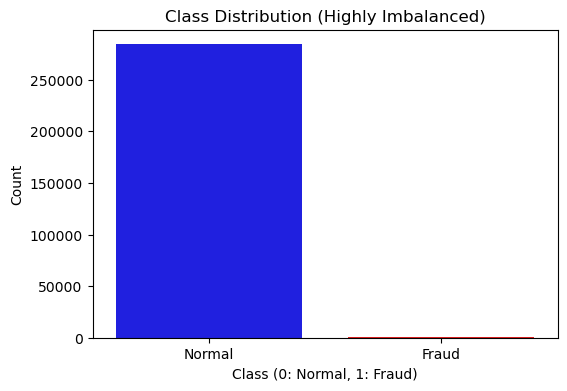

0    99.827251
1     0.172749
Name: Class, dtype: float64


In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title("Class Distribution (Highly Imbalanced)")
plt.xlabel("Class (0: Normal, 1: Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Normal", "Fraud"])
plt.show()

print(df['Class'].value_counts(normalize=True) * 100)


In [ ]:
Transaction Amount Distribution

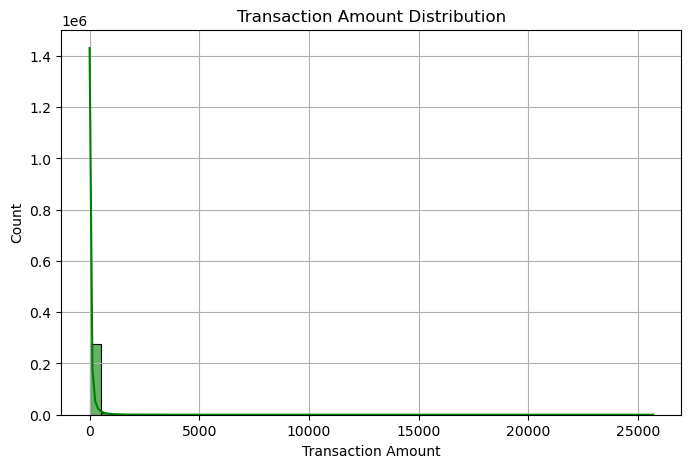

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='green', alpha=0.6)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.grid(True)
plt.show()


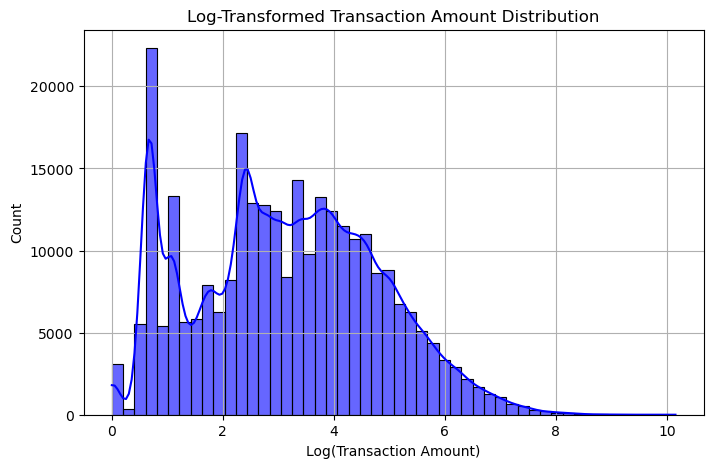

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['log_Amount'] = np.log1p(df['Amount']) 

plt.figure(figsize=(8,5))
sns.histplot(df['log_Amount'], bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Count')
plt.title('Log-Transformed Transaction Amount Distribution')
plt.grid(True)
plt.show()


In [ ]:
Fraud vs. Non-Fraud Transactions (Amount & Time)

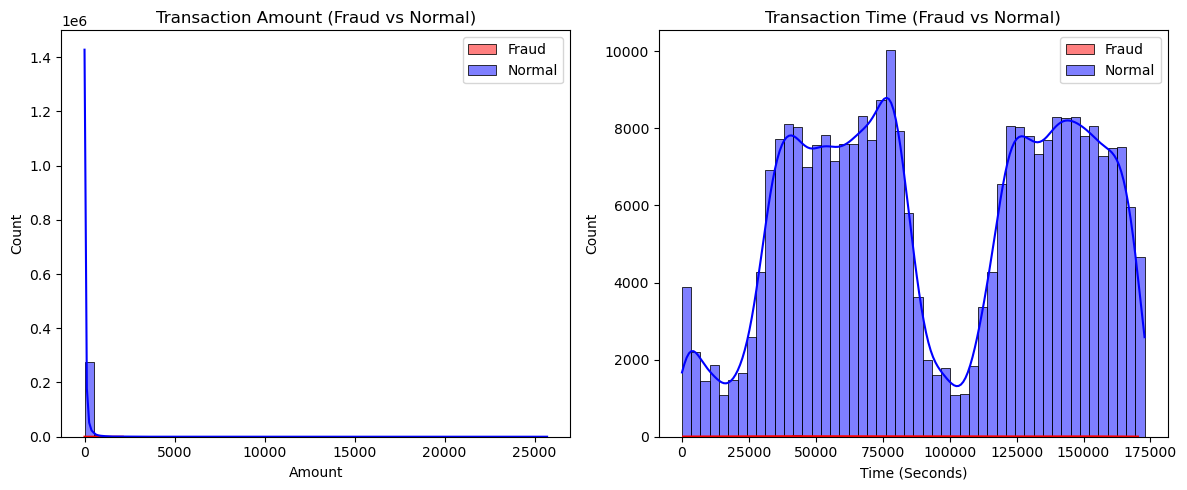

In [12]:
plt.figure(figsize=(12,5))
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]


plt.subplot(1, 2, 1)
sns.histplot(fraud['Amount'], bins=50, kde=True, color='red', label="Fraud")
sns.histplot(non_fraud['Amount'], bins=50, kde=True, color='blue', label="Normal", alpha=0.5)
plt.title("Transaction Amount (Fraud vs Normal)")
plt.xlabel("Amount")
plt.legend()


plt.subplot(1, 2, 2)
sns.histplot(fraud['Time'], bins=50, kde=True, color='red', label="Fraud")
sns.histplot(non_fraud['Time'], bins=50, kde=True, color='blue', label="Normal", alpha=0.5)
plt.title("Transaction Time (Fraud vs Normal)")
plt.xlabel("Time (Seconds)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
Correlation Heatmap (Feature Relationships)

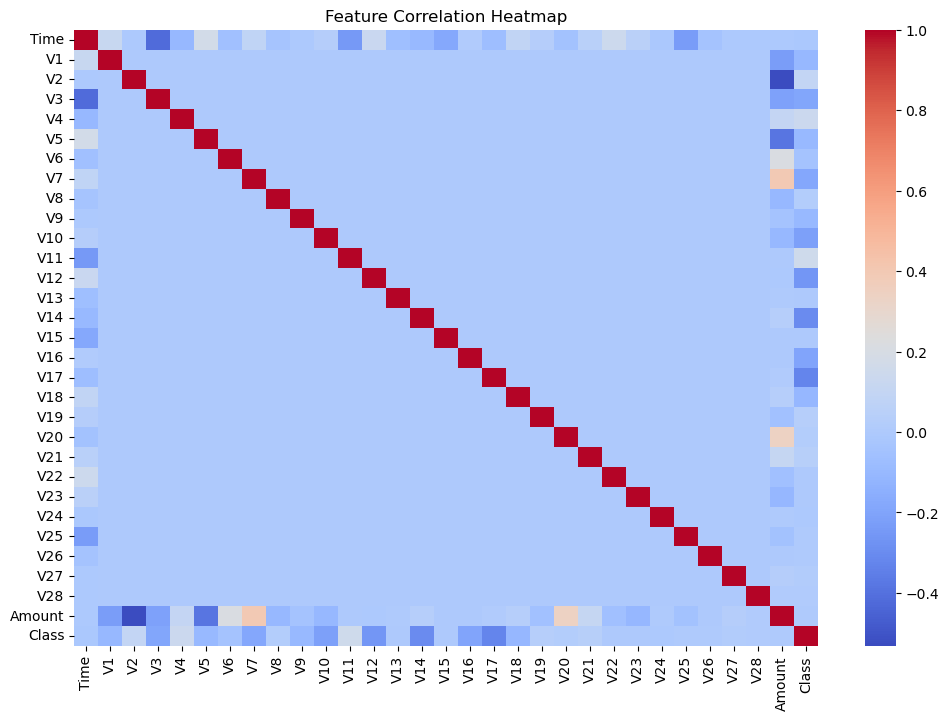

In [13]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
Pairplot for PCA Components (Only Top Features)

[[-0.07278117  1.37815522]
 [ 0.26615071  0.44815408]
 [-1.34016307  0.37977959]
 ...
 [-0.30125385 -0.55782812]
 [ 0.53048251  0.68979917]
 [-0.18973334 -0.50627124]]
V2     0
V4     0
V10    0
V12    0
V14    0
dtype: int64
       PCA1      PCA2 Class
0 -0.072781  1.378155     0
1  0.266151  0.448154     0
2 -1.340163  0.379780     0
3 -0.185226 -0.863291     0
4  0.877737  0.403034     0


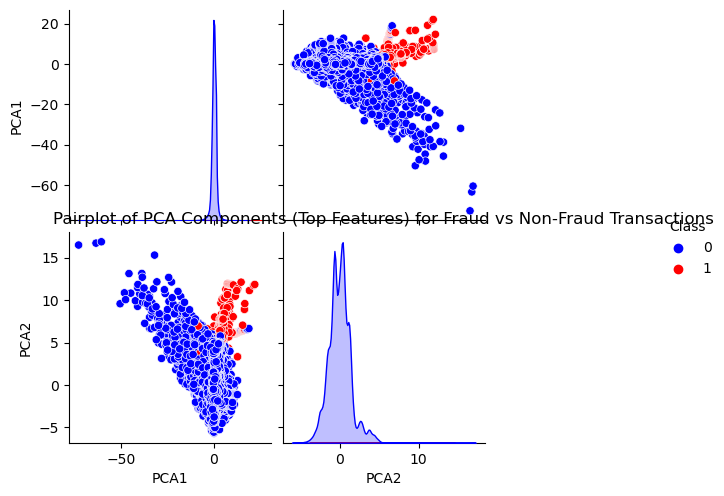

In [5]:
from sklearn.decomposition import PCA  # Import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)
df['Class'] = df['Class'].astype('category')
top_features = ['V2', 'V4', 'V10', 'V12', 'V14']
X = df[top_features]
y = df['Class']


print(X.isnull().sum())  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y

print(pca_df.head())  
sns.pairplot(pca_df, hue='Class', palette=['blue', 'red'])
plt.title("Pairplot of PCA Components (Top Features) for Fraud vs Non-Fraud Transactions")
plt.show()


In [ ]:
Boxplots to Compare Fraud vs. Non-Fraud Transaction Distributions and Detect Outliers

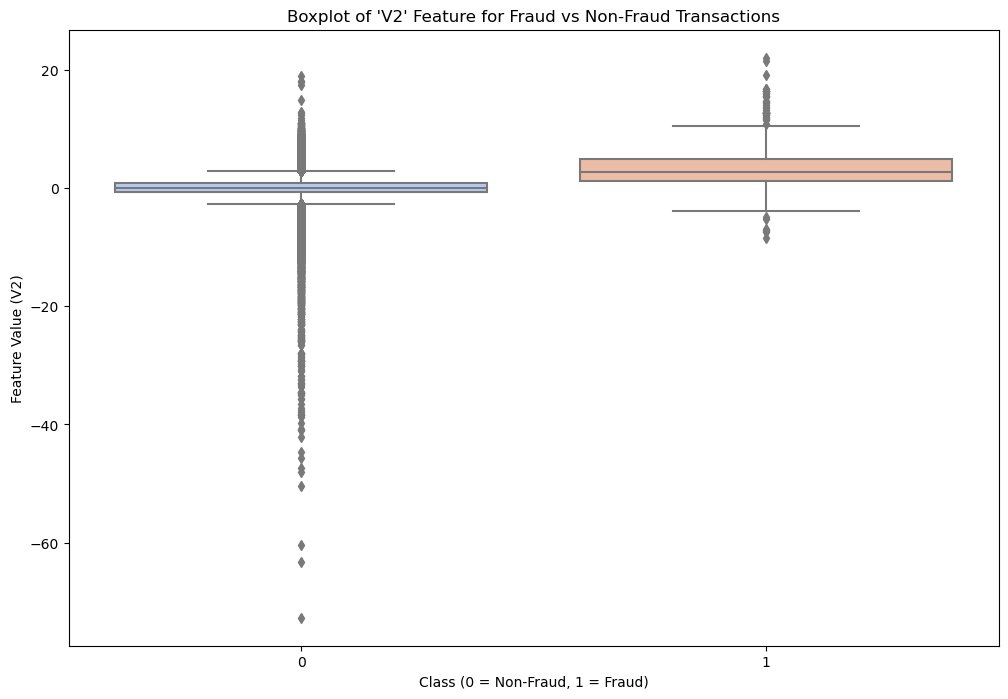

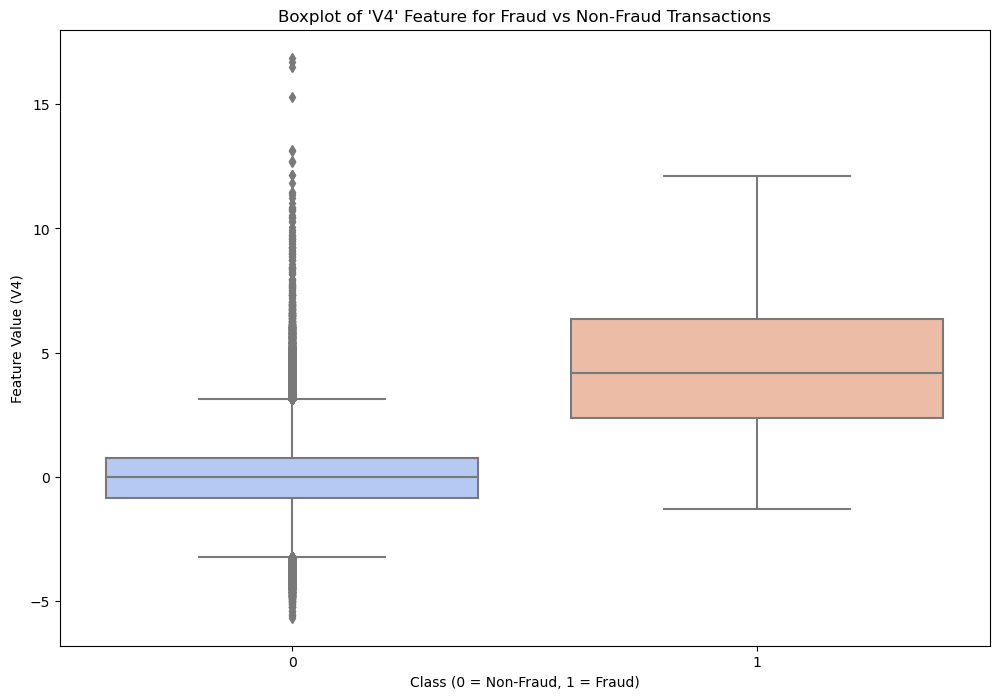

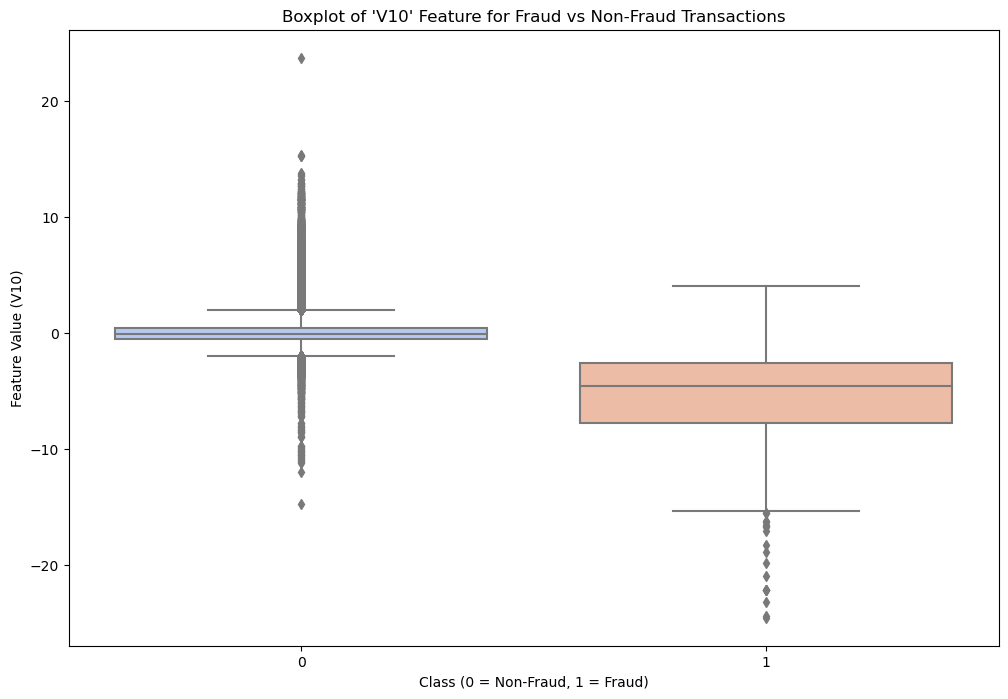

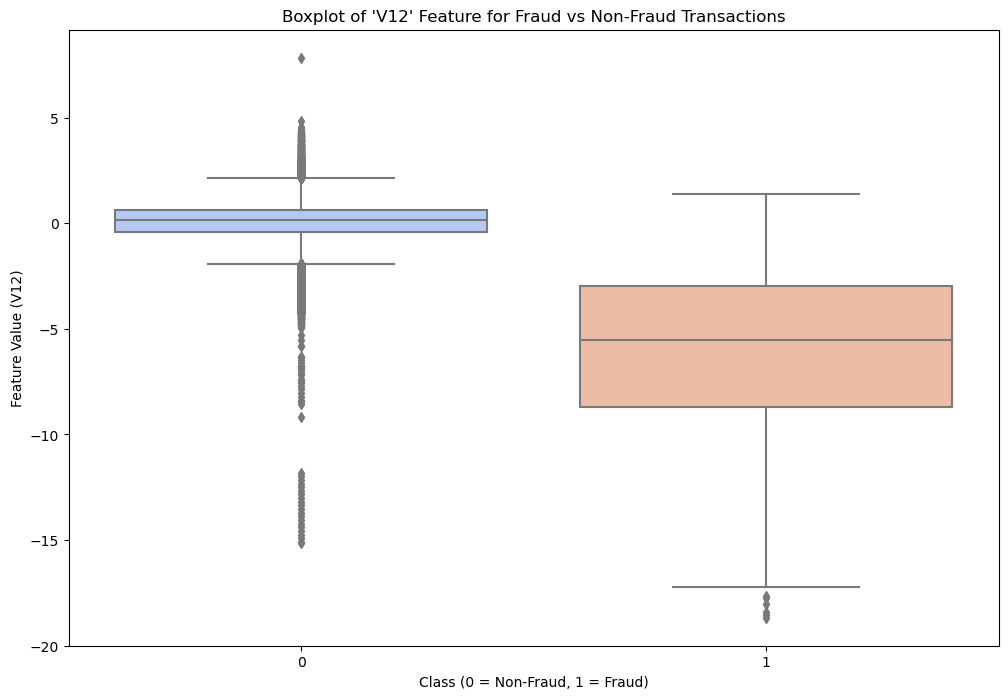

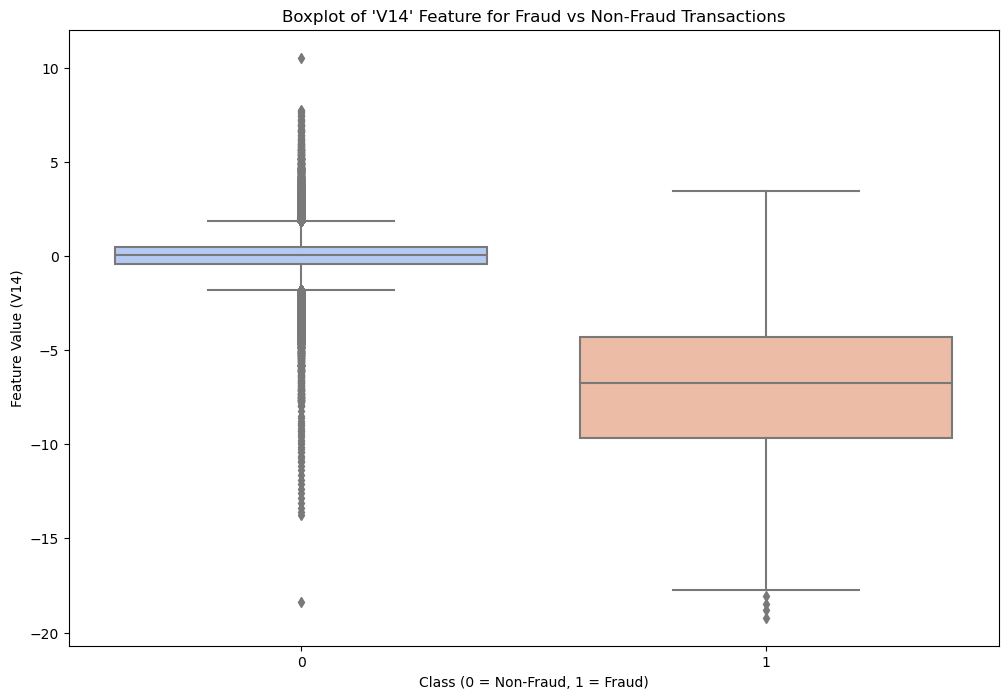

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='V2', data=df, palette='coolwarm')
plt.title("Boxplot of 'V2' Feature for Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Feature Value (V2)")
plt.show()

for feature in ['V4', 'V10', 'V12', 'V14']:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Class', y=feature, data=df, palette='coolwarm')
    plt.title(f"Boxplot of '{feature}' Feature for Fraud vs Non-Fraud Transactions")
    plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
    plt.ylabel(f"Feature Value ({feature})")
    plt.show()


In [ ]:
 Model Training & Evaluation Functions

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """ Train, predict, and evaluate a model """
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    
   
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    cr = classification_report(y_test, y_pred, digits=4)
    print("Classification Report:\n", cr)
    print("="*50, "\n")


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


Model: RandomForestClassifier
Confusion Matrix:
 [[56859     5]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9412    0.8163    0.8743        98

    accuracy                         0.9996     56962
   macro avg     0.9704    0.9081    0.9371     56962
weighted avg     0.9996    0.9996    0.9996     56962




In [ ]:
Implementing Required Machine Learning Models
(a) Support Vector Machine (SVM) - RBF & Linear Kernels


In [ ]:
import warnings
import pandas as pd  
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
X = df.drop(columns=['Class'])  
y = df['Class']  
scaler = RobustScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """ Train, predict, and evaluate a model """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    print(f"Model: {model.__class__.__name__}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    cr = classification_report(y_test, y_pred, digits=4, zero_division=0)  
    print("Classification Report:\n", cr)
    print("="*50, "\n")


svm_rbf = SVC(kernel='rbf', C=0.5, gamma='scale', probability=True)
evaluate_model(svm_rbf, X_train, y_train, X_test, y_test)
svm_linear = SVC(kernel='linear', C=1, probability=True)
evaluate_model(svm_linear, X_train, y_train, X_test, y_test)


Model: SVC
Confusion Matrix:
 [[56864     0]
 [   98     0]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    1.0000    0.9991     56864
           1     0.0000    0.0000    0.0000        98

    accuracy                         0.9983     56962
   macro avg     0.4991    0.5000    0.4996     56962
weighted avg     0.9966    0.9983    0.9974     56962




In [ ]:
(b) K-Nearest Neighbors (KNN)

In [1]:
import warnings
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
X = df.drop(columns=['Class'])  
y = df['Class'] 

scaler = RobustScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """ Train, predict, and evaluate a model """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    
    cr = classification_report(y_test, y_pred, digits=4, zero_division=0)  
    print("Classification Report:\n", cr)
    print("="*50, "\n")
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test)


Model: KNeighborsClassifier
Confusion Matrix:
 [[56864     0]
 [   86    12]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    1.0000    0.9992     56864
           1     1.0000    0.1224    0.2182        98

    accuracy                         0.9985     56962
   macro avg     0.9992    0.5612    0.6087     56962
weighted avg     0.9985    0.9985    0.9979     56962




In [ ]:
(c) Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv") 
X = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy_score(y_test, y_pred) 


rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)


Accuracy: 0.9995962220427653
Confusion Matrix:
 [[56859     5]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9995962220427653

In [ ]:
(d) Decision Tree


In [2]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test)


Accuracy: 0.9991397773954567
Confusion Matrix:
 [[56840    24]
 [   25    73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.9991397773954567

In [ ]:
(e) Linear & Quadratic Discriminant Analysis (LDA & QDA)

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
evaluate_model(lda, X_train, y_train, X_test, y_test)

qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  
evaluate_model(qda, X_train, y_train, X_test, y_test)


Accuracy: 0.9993679997191109
Confusion Matrix:
 [[56847    17]
 [   19    79]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9751764334117482
Confusion Matrix:
 [[55462  1402]
 [   12    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



0.9751764334117482

In [ ]:
 (f) Naïve Bayes (NB)


In [4]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)


Accuracy: 0.9922755521224677
Confusion Matrix:
 [[56457   407]
 [   33    65]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.66      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.83      0.61     56962
weighted avg       1.00      0.99      0.99     56962



0.9922755521224677

In [ ]:
(g) Neural Network (with Dropout)

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, nn_pred, digits=4, zero_division=1))


Epoch 1/10
7121/7121 [==============================] - 26s 3ms/step - loss: 22.5265 - accuracy: 0.9947 - val_loss: 0.0431 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0704 - accuracy: 0.9982 - val_loss: 0.0143 - val_accuracy: 0.9983
Epoch 3/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0321 - accuracy: 0.9982 - val_loss: 0.0155 - val_accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0616 - accuracy: 0.9982 - val_loss: 0.0199 - val_accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0242 - accuracy: 0.9983 - val_loss: 0.0210 - val_accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0335 - accuracy: 0.9982 - val_loss: 0.0296 - val_accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0424 - accuracy: 0.9982 - val_loss: 0.0454 - val_a

In [ ]:
 Cross-Validation for Model Evaluation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, df_scaled, df['Class'], cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.00593378 0.99959622 0.99917487 0.99966644 0.99943821]
Mean accuracy: 0.8007619054089554


In [ ]:
 Code Structure (Modular Code)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv(r'C:\Users\Pallavi\Downloads\creditcard.csv') 

def preprocess_data(df):
    """
    Preprocess the data by handling missing values and scaling features.
    """
    df.fillna(df.median(), inplace=True)

    features = df.drop('Class', axis=1)  
    target = df['Class']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    return scaled_features, target

def train_model(X, y):
    """
    Train a Random Forest Classifier model.
    """
    model = RandomForestClassifier()
    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    """
    Evaluate the model using cross-validation.
    """
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

X, y = preprocess_data(df)  
model = train_model(X, y) 
accuracy = evaluate_model(model, X, y)  

print(f"Model accuracy: {accuracy}")


Model accuracy: 0.802587683874909


In [ ]:
Feature Importance for random forest 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

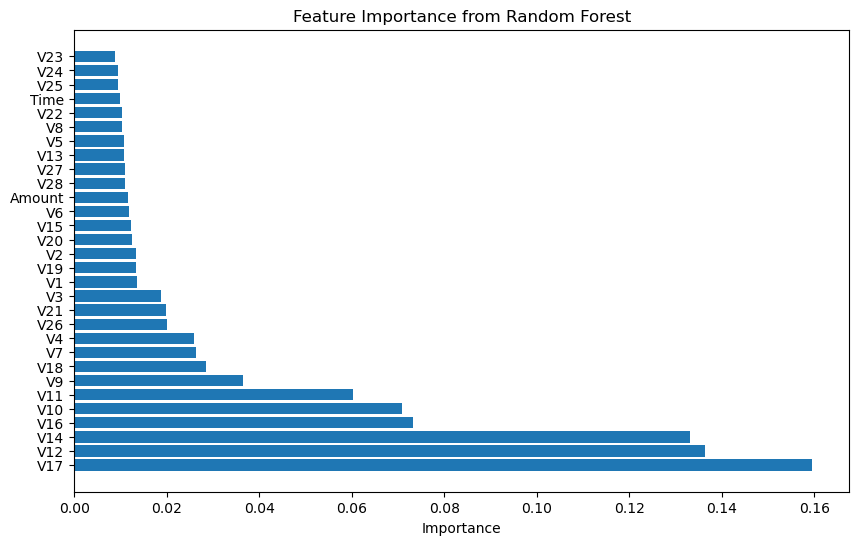

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\Pallavi\Downloads\creditcard.csv")
print(df.head())

X = df.drop('Class', axis=1)  
y = df['Class'] 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)  
x_test_scaler = scaler.transform(x_test)  

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train_scaler, y_train)

importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
Feature Importance for DecisionTreeClassifier

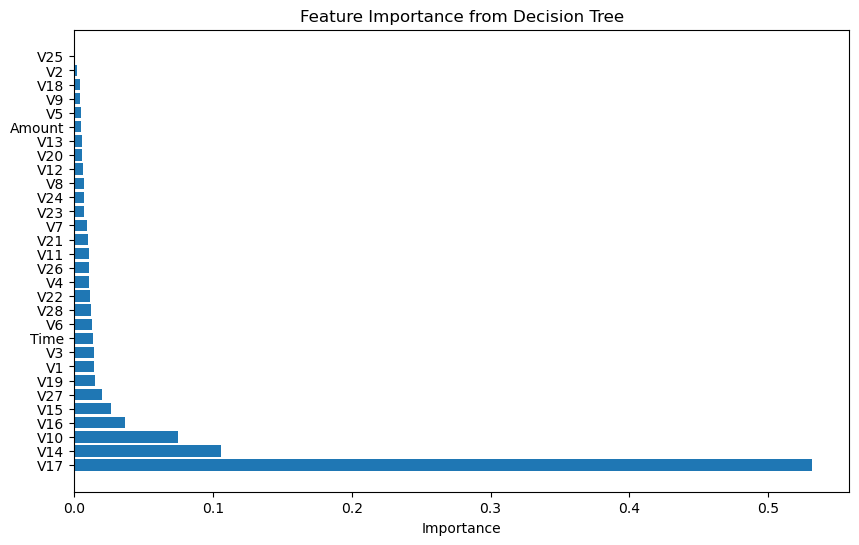

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train_scaler, y_train)
dt_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': dt_model.feature_importances_})

dt_importances = dt_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(dt_importances['Feature'], dt_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


In [ ]:
Feature Importance for LogisticRegression

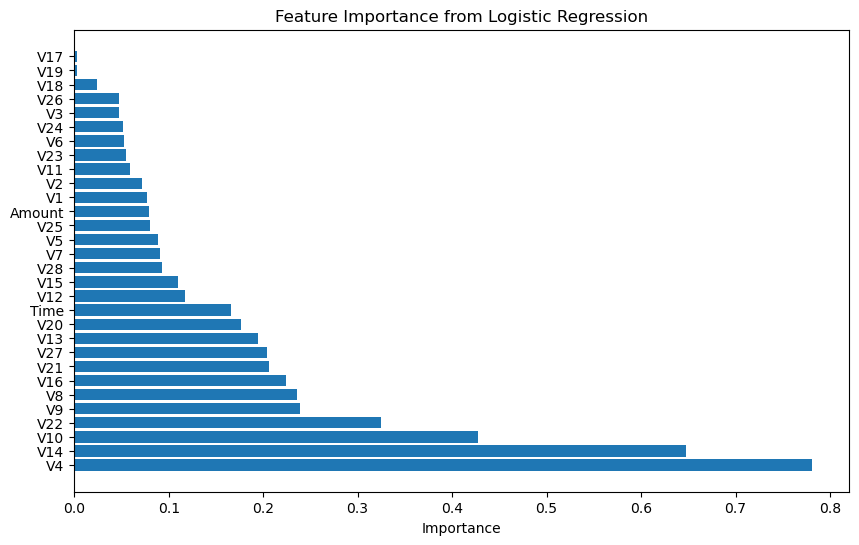

In [4]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train_scaler, y_train)
lr_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': abs(lr_model.coef_[0])})
lr_importances = lr_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lr_importances['Feature'], lr_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Logistic Regression')
plt.show()


In [ ]:
Feature Importance for neural_network permutation_importance

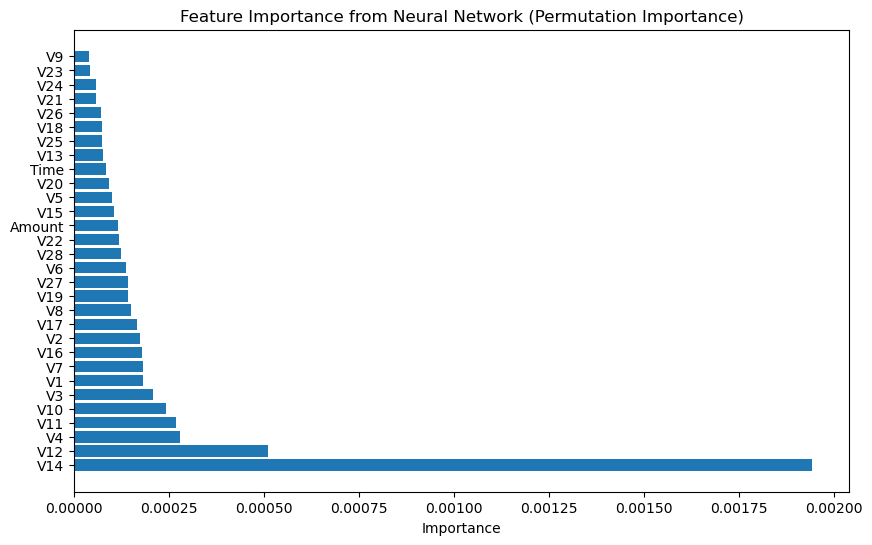

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(x_train_scaler, y_train)
perm_importance = permutation_importance(nn_model, x_train_scaler, y_train, n_repeats=10, random_state=42)
nn_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': perm_importance.importances_mean})
nn_importances = nn_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(nn_importances['Feature'], nn_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Neural Network (Permutation Importance)')
plt.show()


In [ ]:
Feature Importance for KNeighborsClassifier permutation_importance

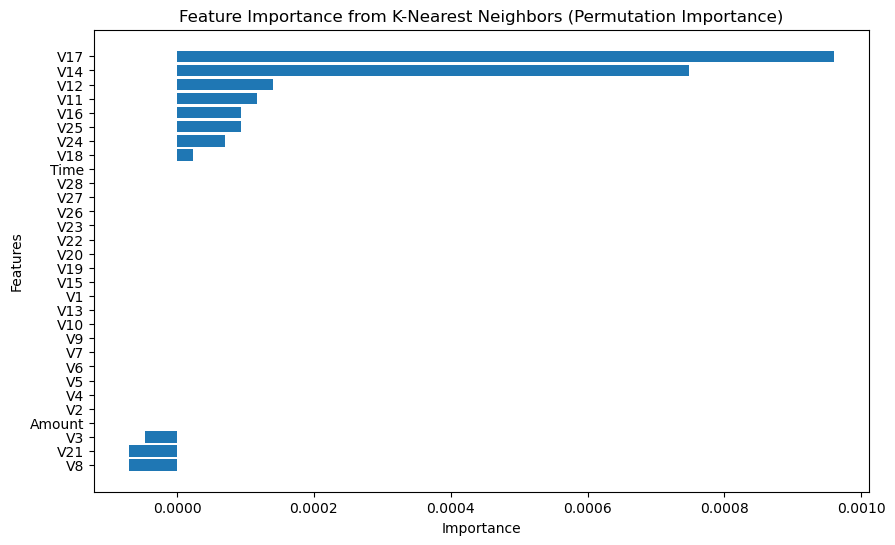

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

df = pd.read_csv(r"C:\Users\Pallavi\Downloads\creditcard.csv")  

X = df.drop(columns=['Class'])  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled_df, y_train)

knn_perm_importance = permutation_importance(knn_model, X_test_scaled_df, y_test, n_repeats=3, random_state=42, scoring='accuracy')

knn_importances = pd.DataFrame({'Feature': X.columns, 'Importance': knn_perm_importance.importances_mean})

knn_importances = knn_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(knn_importances['Feature'], knn_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from K-Nearest Neighbors (Permutation Importance)')
plt.gca().invert_yaxis()  
plt.show()


In [ ]:
Feature Importance for naive_bayes  permutation_importance

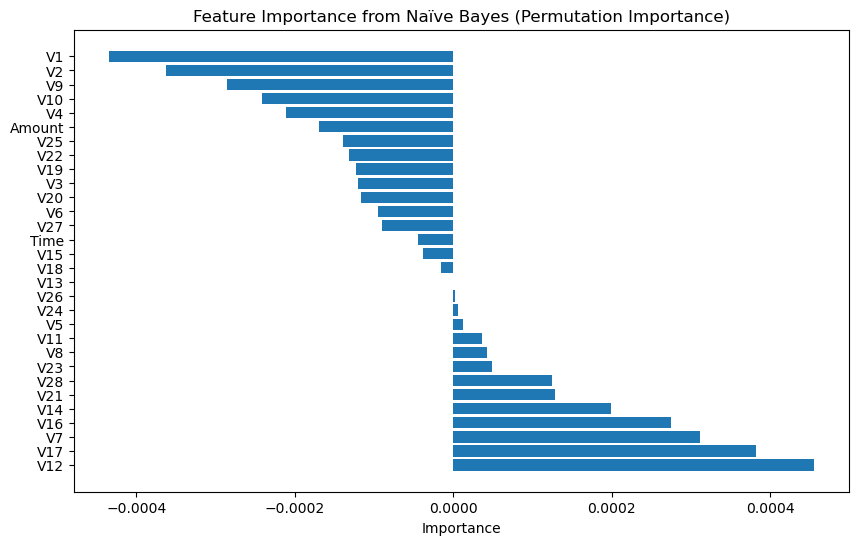

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

df = pd.read_csv(r"C:\Users\Pallavi\Downloads\creditcard.csv")  

X = df.drop('Class', axis=1)  
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

nb_model = GaussianNB()


nb_model.fit(X_train_scaled_df, y_train)

nb_perm_importance = permutation_importance(nb_model, X_train_scaled_df, y_train, n_repeats=10, random_state=42)

nb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': nb_perm_importance.importances_mean})

nb_importances = nb_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(nb_importances['Feature'], nb_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Naïve Bayes (Permutation Importance)')
plt.show()


In [ ]:
Model Evaluation, ROC Curve Comparison and Performance Comparison for Fraud Detection


Classification Report for SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.71      0.81        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9723278168892768

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9437429656724817

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0

C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.83      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9741215704064405


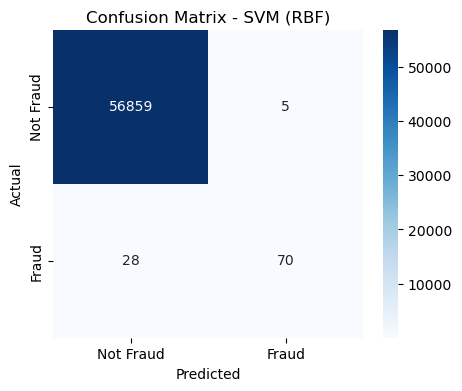

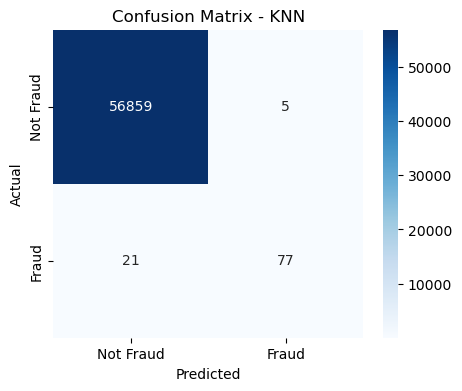

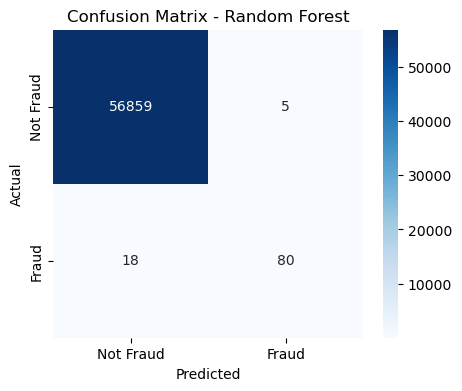

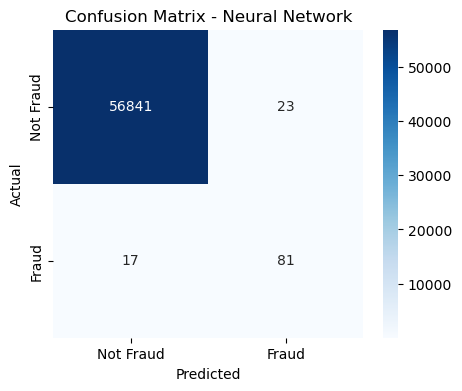

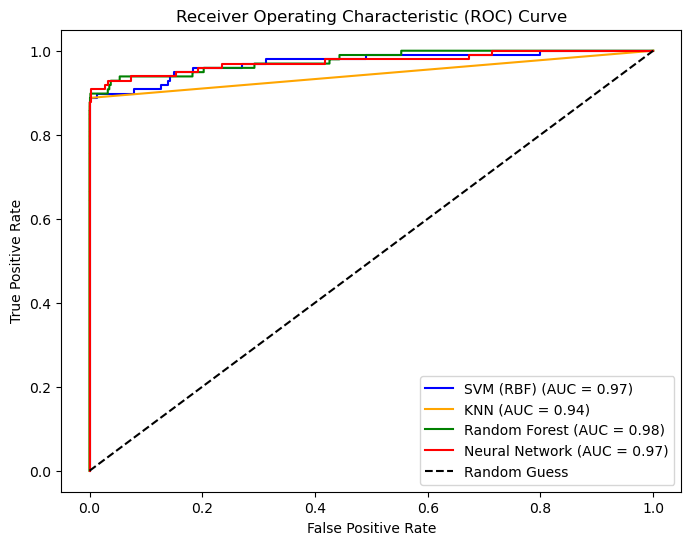

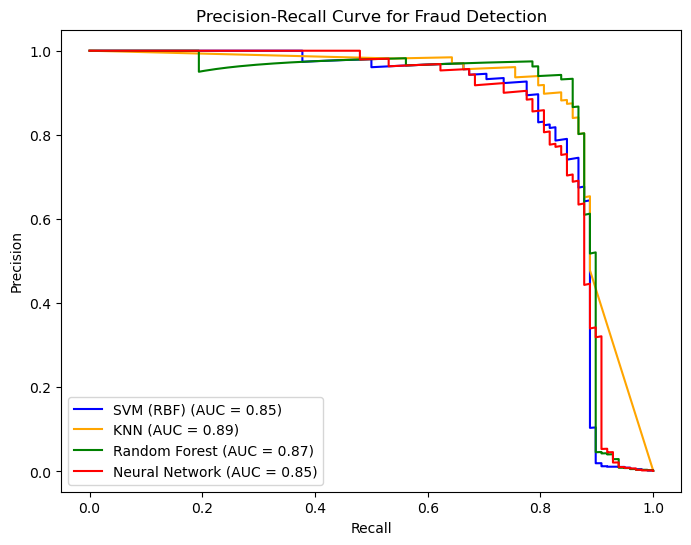

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_final = SVC(C=10, kernel='rbf', gamma='scale', probability=True, random_state=42)
knn_final = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
rf_final = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
mlp_final = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0005,
                          batch_size=64, learning_rate_init=0.0005, max_iter=20, random_state=42)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    t
    print("\nClassification Report for", model.__class__.__name__)
    print(classification_report(y_test, y_pred, zero_division=1))

    if y_pred_proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


for model in [svm_final, knn_final, rf_final, mlp_final]:
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)


def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


plot_confusion_matrix(svm_final, X_test_scaled, y_test, "SVM (RBF)")
plot_confusion_matrix(knn_final, X_test_scaled, y_test, "KNN")
plot_confusion_matrix(rf_final, X_test_scaled, y_test, "Random Forest")
plot_confusion_matrix(mlp_final, X_test_scaled, y_test, "Neural Network")


plt.figure(figsize=(8, 6))
models = [svm_final, knn_final, rf_final, mlp_final]
model_names = ['SVM (RBF)', 'KNN', 'Random Forest', 'Neural Network']
colors = ['blue', 'orange', 'green', 'red']

for i, model in enumerate(models):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=f"{model_names[i]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
for i, model in enumerate(models):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color=colors[i], label=f"{model_names[i]} (AUC = {pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Fraud Detection")
plt.legend()
plt.show()


In [ ]:
Model Performance Comparison

                Accuracy  Precision    Recall  F1-Score   ROC-AUC
SVM (RBF)       0.999421   0.957746  0.693878  0.804734  0.968111
KNN             0.999544   0.918605  0.806122  0.858696  0.943743
Random Forest   0.999596   0.941176  0.816327  0.874317  0.963027
Decision Tree   0.999140   0.752577  0.744898  0.748718  0.872238
LDA             0.999368   0.822917  0.806122  0.814433  0.981066
QDA             0.975756   0.059107  0.877551  0.110753  0.965692
Naïve Bayes     0.976405   0.058782  0.846939  0.109934  0.963248
Neural Network  0.999561   0.910112  0.826531  0.866310  0.971058


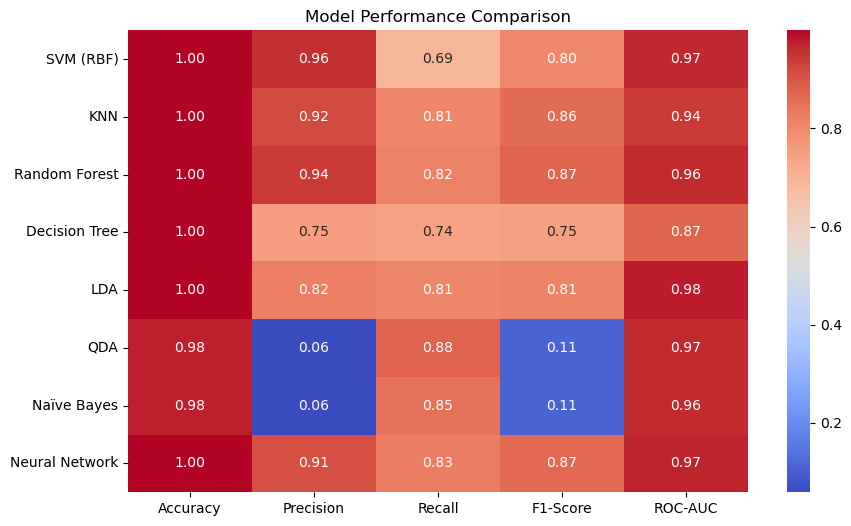

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


df = pd.read_csv(r'C:\Users\Pallavi\Downloads\creditcard.csv')

X = df.drop(columns=['Class'])  
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naïve Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)
}


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)


results_df = pd.DataFrame(results).T
print(results_df)

results_df.to_csv(r'C:\Users\Pallavi\Downloads\model_performance.csv')

plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Model Performance Comparison")
plt.show()


In [ ]:
Hyperparameter Tuning for Optimized Performance
1. Support Vector Machine (SVM) Tuning

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
df_sampled = resample(df, n_samples=1000, stratify=df['Class'], random_state=42)

X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud_sample = fraud.sample(n=10, random_state=42)
non_fraud_sample = non_fraud.sample(n=990, random_state=42)
df_balanced = pd.concat([fraud_sample, non_fraud_sample])


X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


param_grid_svm = {
    'C': [1],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=2, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Best Parameters for SVM:", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_train, y_train, X_test, y_test)


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.99
ROC AUC: 0.4772727272727273
Confusion Matrix:
 [[198   0]
 [  2   0]]


In [ ]:
2. Knn Tunning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils import resample


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
df_sampled = resample(df, n_samples=5000, random_state=42, stratify=df['Class'])
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn,
                                n_iter=4, cv=2, scoring='roc_auc', n_jobs=-1)
random_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", random_knn.best_params_)
print("Test Accuracy:", accuracy_score(y_test, random_knn.predict(X_test)))
print("Test ROC AUC:", roc_auc_score(y_test, random_knn.predict_proba(X_test)[:, 1]))


Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
Test Accuracy: 0.999
Test ROC AUC: 0.498998998998999


In [ ]:
3.Random Forest Tuning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils import resample

df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
df_sampled = resample(df, n_samples=5000, random_state=42, stratify=df['Class'])
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf,
                               n_iter=4, cv=2, scoring='roc_auc', n_jobs=-1)
random_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", random_rf.best_params_)
print("Test Accuracy:", accuracy_score(y_test, random_rf.predict(X_test)))
print("Test ROC AUC:", roc_auc_score(y_test, random_rf.predict_proba(X_test)[:, 1]))


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Test Accuracy: 1.0
Test ROC AUC: 1.0


In [ ]:
4.Neural Network (Dropout) Tuning

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import resample
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
df_sampled = resample(df, n_samples=5000, stratify=df['Class'], random_state=42)

X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_nn(dropout_rate=0.3, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


nn_model = KerasClassifier(build_fn=build_nn, verbose=0)

param_dist_nn = {
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001],
    'batch_size': [32],
    'epochs': [5, 10]
}

random_nn = RandomizedSearchCV(nn_model, param_distributions=param_dist_nn,
                               n_iter=2, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)
random_nn.fit(X_train, y_train)

print("Best Parameters for Neural Network:", random_nn.best_params_)


C:\Users\Pallavi\AppData\Local\Temp\ipykernel_11864\4113978574.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=build_nn, verbose=0)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for Neural Network: {'learning_rate': 0.001, 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 32}


In [ ]:
Hyperparameter Tuning and Evaluation of Machine Learning Models for Credit Card Fraud Detection


SVM Performance:
Accuracy: 0.9983
ROC AUC: 0.4790
Confusion Matrix:
[[56864     0]
 [   98     0]]

KNN Performance:
Accuracy: 0.9984
ROC AUC: 0.6059
Confusion Matrix:
[[56864     0]
 [   93     5]]

Random Forest Performance:
Accuracy: 0.9996
ROC AUC: 0.9757
Confusion Matrix:
[[56862     2]
 [   23    75]]
1781/1781 [==============================] - 3s 2ms/step

Neural Network Performance:
Accuracy: 0.9983
ROC AUC: 0.5001
Confusion Matrix:
[[56864     0]
 [   98     0]]


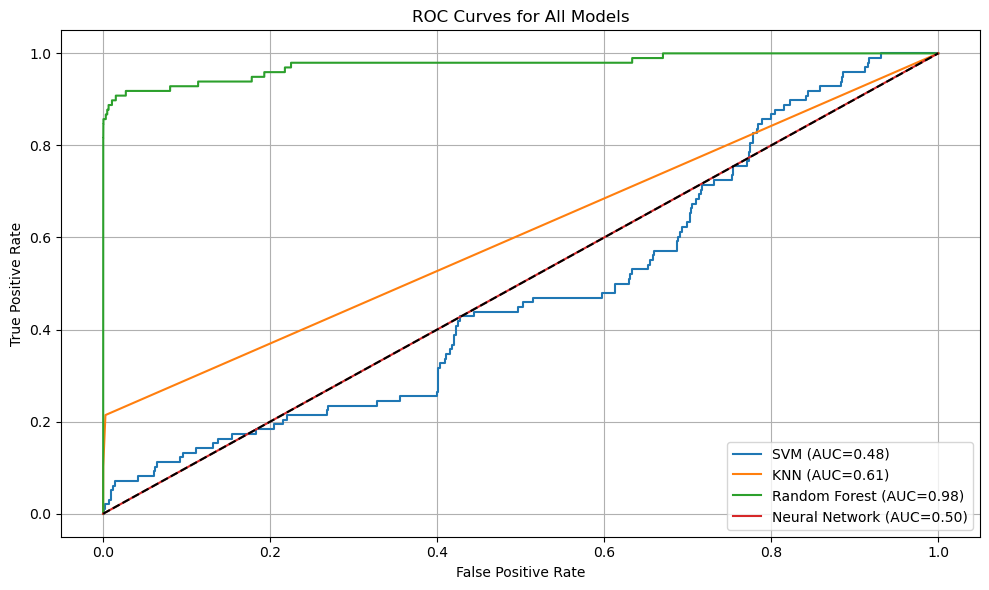

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_and_plot(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    try:
        auc = roc_auc_score(y_test, y_score)
    except:
        auc = float('nan')
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")

# -------------------- 1. SVM --------------------
param_svm = {
    'C': [1],
    'kernel': ['rbf'],
    'gamma': ['scale']
}
grid_svm = GridSearchCV(SVC(probability=True), param_svm, cv=2, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_svm.fit(X_train, y_train)

# -------------------- 2. KNN --------------------
param_knn = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'metric': ['euclidean']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=2, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_knn.fit(X_train, y_train)

# -------------------- 3. Random Forest --------------------
param_rf = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=2, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_rf.fit(X_train, y_train)

# -------------------- 4. Neural Network --------------------
def build_nn(dropout_rate=0.3, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=build_nn, verbose=0)
param_nn = {
    'dropout_rate': [0.3],
    'learning_rate': [0.001],
    'batch_size': [64],
    'epochs': [5]
}
grid_nn = GridSearchCV(nn_model, param_nn, cv=2, scoring='accuracy', n_jobs=-1, verbose=0)
grid_nn.fit(X_train, y_train)

# -------------------- Evaluate All --------------------
plt.figure(figsize=(10, 6))

evaluate_and_plot(grid_svm.best_estimator_, X_test, y_test, "SVM")
evaluate_and_plot(grid_knn.best_estimator_, X_test, y_test, "KNN")
evaluate_and_plot(grid_rf.best_estimator_, X_test, y_test, "Random Forest")
evaluate_and_plot(grid_nn.best_estimator_, X_test, y_test, "Neural Network")


plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Train the Final Models with Optimized Parameters

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")


X = df.drop('Class', axis=1)  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    
    if y_pred_proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


svm_final = SVC(C=10, kernel='rbf', gamma='scale', probability=True)
evaluate_model(svm_final, X_train, y_train, X_test, y_test)


knn_final = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
evaluate_model(knn_final, X_train, y_train, X_test, y_test)

rf_final = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
evaluate_model(rf_final, X_train, y_train, X_test, y_test)

mlp_final = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0005,
                          batch_size=64, learning_rate_init=0.0005, max_iter=20, random_state=42)
evaluate_model(mlp_final, X_train, y_train, X_test, y_test)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.727732405567742

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.17      0.30        98

    accuracy                           1.00     56962
   macro avg       1.00      0.59      0.65     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.6523129299553249

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1

C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.69      0.67        98

    accuracy                           1.00     56962
   macro avg       0.82      0.85      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9161369985529383


In [ ]:
2. Ensemble Learning 

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\creditcard.csv")
X = df.drop('Class', axis=1)  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_final = SVC(C=10, kernel='rbf', gamma='scale', probability=True)
knn_final = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
rf_final = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
mlp_final = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0005,
                          batch_size=64, learning_rate_init=0.0005, max_iter=100, early_stopping=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('SVM', svm_final), ('KNN', knn_final), ('RF', rf_final), ('NN', mlp_final)],
    voting='soft'  
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.27      0.42        98

    accuracy                           1.00     56962
   macro avg       1.00      0.63      0.71     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56864     0]
 [   72    26]]
